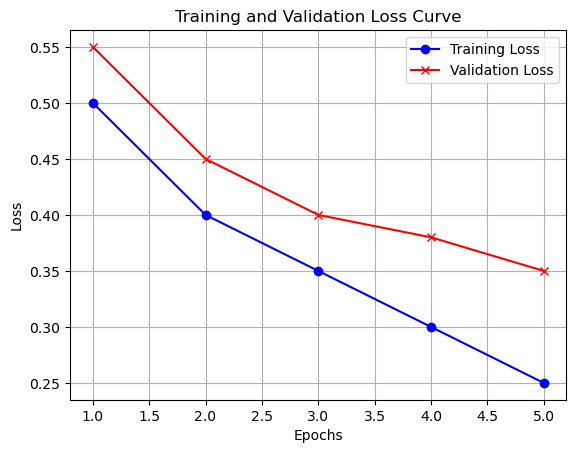

In [4]:
import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5]  # Dummy epoch data
training_loss = [0.5, 0.4, 0.35, 0.3, 0.25]  # Dummy training loss values
validation_loss = [0.55, 0.45, 0.4, 0.38, 0.35]  # Dummy validation loss values

plt.plot(epochs, training_loss, label='Training Loss', color='blue', linestyle='-', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', color='red', linestyle='-', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
df = pd.read_csv('E:\projects\SolveItEasy\examples\exp_ex\eval_loss_ex.csv')

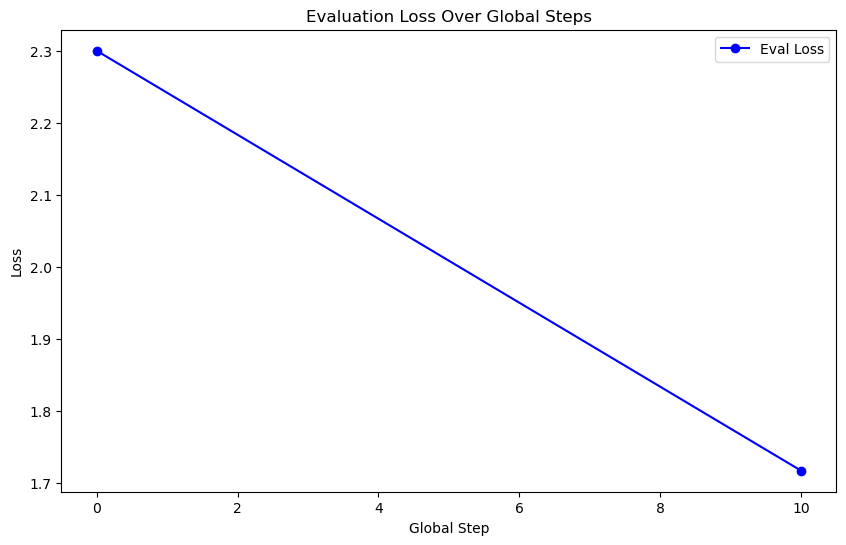

In [12]:
# Cleaning the dataset to ensure no invalid or non-numeric values
df_cleaned = df.copy()

# Convert any non-numeric values to NaN (for proper plotting)
df_cleaned['amber-wave-171 - eval/loss'] = pd.to_numeric(df_cleaned['amber-wave-171 - eval/loss'], errors='coerce')
df_cleaned['amber-wave-171 - eval/loss__MIN'] = pd.to_numeric(df_cleaned['amber-wave-171 - eval/loss__MIN'], errors='coerce')
df_cleaned['amber-wave-171 - eval/loss__MAX'] = pd.to_numeric(df_cleaned['amber-wave-171 - eval/loss__MAX'], errors='coerce')

# Plot the eval loss over the global steps
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned["train/global_step"], df_cleaned["amber-wave-171 - eval/loss"], label='Eval Loss', color='blue', marker='o')
plt.fill_between(df_cleaned["train/global_step"], df_cleaned["amber-wave-171 - eval/loss__MIN"], df_cleaned["amber-wave-171 - eval/loss__MAX"], color='blue', alpha=0.2)

# Adding labels and title
plt.xlabel('Global Step')
plt.ylabel('Loss')
plt.title('Evaluation Loss Over Global Steps')
plt.legend()

# Show the plot
plt.grid(False)
plt.savefig('val_loss_ex.png')
plt.show()


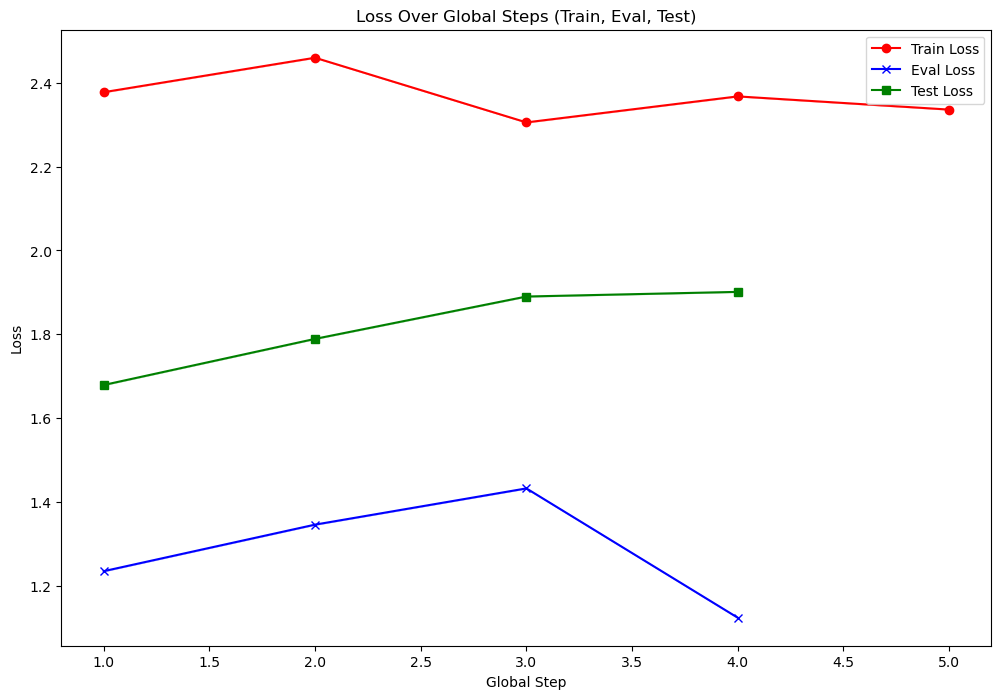

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_losses(train_data, eval_data, test_data):
    """
    Function to plot training, evaluation, and testing loss over global steps.
    
    Parameters:
    - train_data (list of tuples): Data for training loss with global step, loss, min, and max.
    - eval_data (list of tuples): Data for evaluation loss with global step, loss, min, and max.
    - test_data (list of tuples): Data for testing loss with global step, loss, min, and max.
    """
    # Create DataFrames for train, eval, and test losses
    df_train = pd.DataFrame(train_data, columns=["global_step", "train/_step", "train/_step__MIN", "train/_step__MAX", "train/loss", "train/loss__MIN", "train/loss__MAX"])
    df_eval = pd.DataFrame(eval_data, columns=["global_step", "eval/_step", "eval/_step__MIN", "eval/_step__MAX", "eval/loss", "eval/loss__MIN", "eval/loss__MAX"])
    df_test = pd.DataFrame(test_data, columns=["global_step", "test/_step", "test/_step__MIN", "test/_step__MAX", "test/loss", "test/loss__MIN", "test/loss__MAX"])

    # Ensure all columns are numeric
    df_train[['train/loss', 'train/loss__MIN', 'train/loss__MAX']] = df_train[['train/loss', 'train/loss__MIN', 'train/loss__MAX']].apply(pd.to_numeric, errors='coerce')
    df_eval[['eval/loss', 'eval/loss__MIN', 'eval/loss__MAX']] = df_eval[['eval/loss', 'eval/loss__MIN', 'eval/loss__MAX']].apply(pd.to_numeric, errors='coerce')
    df_test[['test/loss', 'test/loss__MIN', 'test/loss__MAX']] = df_test[['test/loss', 'test/loss__MIN', 'test/loss__MAX']].apply(pd.to_numeric, errors='coerce')

    # Drop any rows that contain NaN after conversion
    df_train = df_train.dropna()
    df_eval = df_eval.dropna()
    df_test = df_test.dropna()

    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot Training Loss
    plt.plot(df_train["global_step"], df_train["train/loss"], label='Train Loss', color='red', marker='o')
    plt.fill_between(df_train["global_step"], df_train["train/loss__MIN"], df_train["train/loss__MAX"], color='red', alpha=0.2)
    
    # Plot Evaluation Loss
    plt.plot(df_eval["global_step"], df_eval["eval/loss"], label='Eval Loss', color='blue', marker='x')
    plt.fill_between(df_eval["global_step"], df_eval["eval/loss__MIN"], df_eval["eval/loss__MAX"], color='blue', alpha=0.2)

    # Plot Test Loss
    plt.plot(df_test["global_step"], df_test["test/loss"], label='Test Loss', color='green', marker='s')
    plt.fill_between(df_test["global_step"], df_test["test/loss__MIN"], df_test["test/loss__MAX"], color='green', alpha=0.2)

    # Adding labels and title
    plt.xlabel('Global Step')
    plt.ylabel('Loss')
    plt.title('Loss Over Global Steps (Train, Eval, Test)')
    plt.legend()

    # Show the plot
    plt.grid(False)
    plt.savefig('loss_ex.png')
    plt.show()

# Example Data (Replace with your actual data)
train_data = [
    (1, 5.5, 5, 6, 2.3778, 2.3778, 2.3778),
    (2, 7.5, 7, 8, 2.4601, 2.4601, 2.4601),
    (3, 9.5, 9, 10, 2.3057, 2.3057, 2.3057),
    (4, 11.5, 11, 12, 2.3678, 2.3678, 2.3678),
    (5, 13.5, 13, 14, 2.3363, 2.3363, 2.3363),
]

eval_data = [
    (1, 6, 5.5, 6.5, 1.2345, 1.2345, 1.2345),
    (2, 8, 7.5, 8.5, 1.3456, 1.3456, 1.3456),
    (3, 10, 9.5, 10.5, 1.4321, 1.4321, 1.4321),
    (4, 12, 11.5, 12.5, 1.1234, 1.1234, 1.1234),
]

test_data = [
    (1, 7, 6.5, 7.5, 1.6789, 1.6789, 1.6789),
    (2, 9, 8.5, 9.5, 1.7890, 1.7890, 1.7890),
    (3, 11, 10.5, 11.5, 1.8901, 1.8901, 1.8901),
    (4, 13, 12.5, 13.5, 1.9012, 1.9012, 1.9012),
]

# Call the function to plot
plot_losses(train_data, eval_data, test_data)
